In [44]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib
import matplotlib.pyplot as plt

In [45]:
df=pd.read_csv('train_store.csv')

C:\Users\George Ch\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
df_store=pd.read_csv('store.csv')

In [139]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7


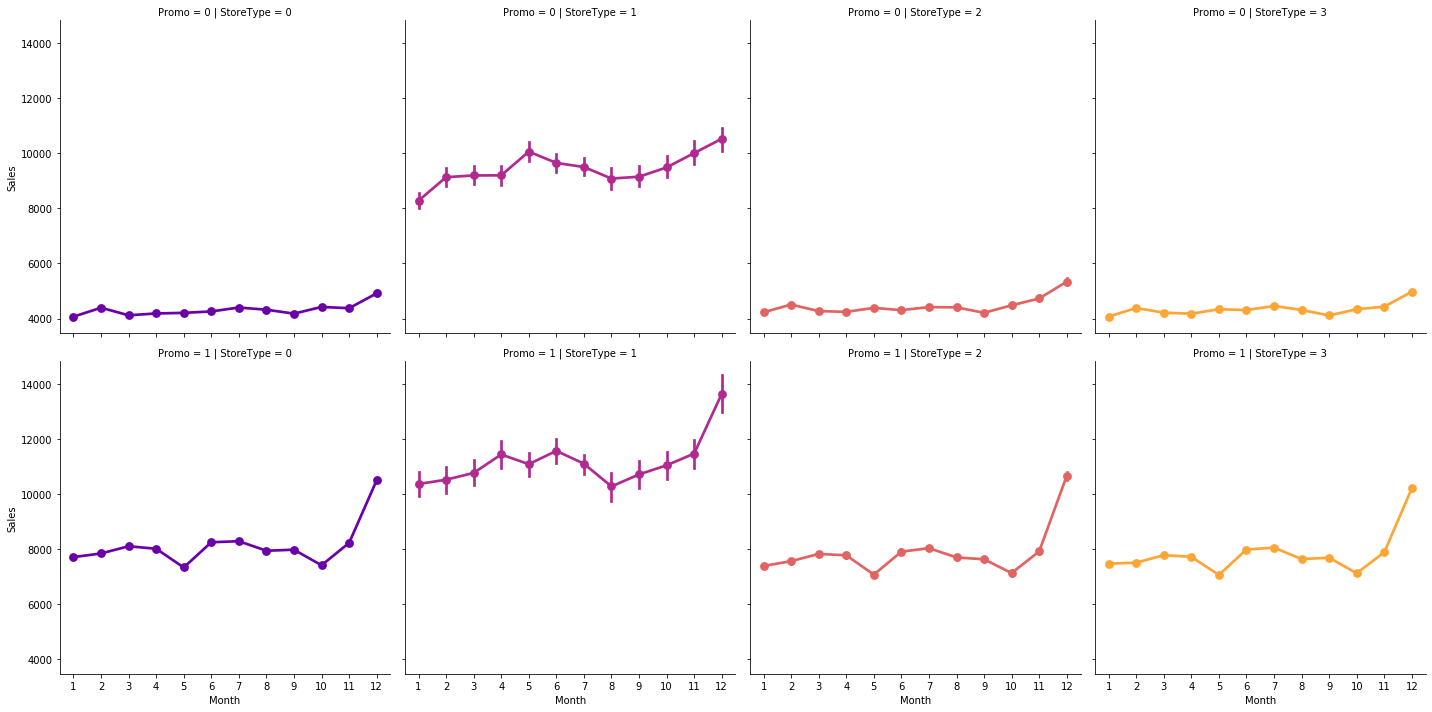

In [142]:
sns.factorplot(data = df_main, x = 'Month', y = "Sales", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo') 

C:\Users\George Ch\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


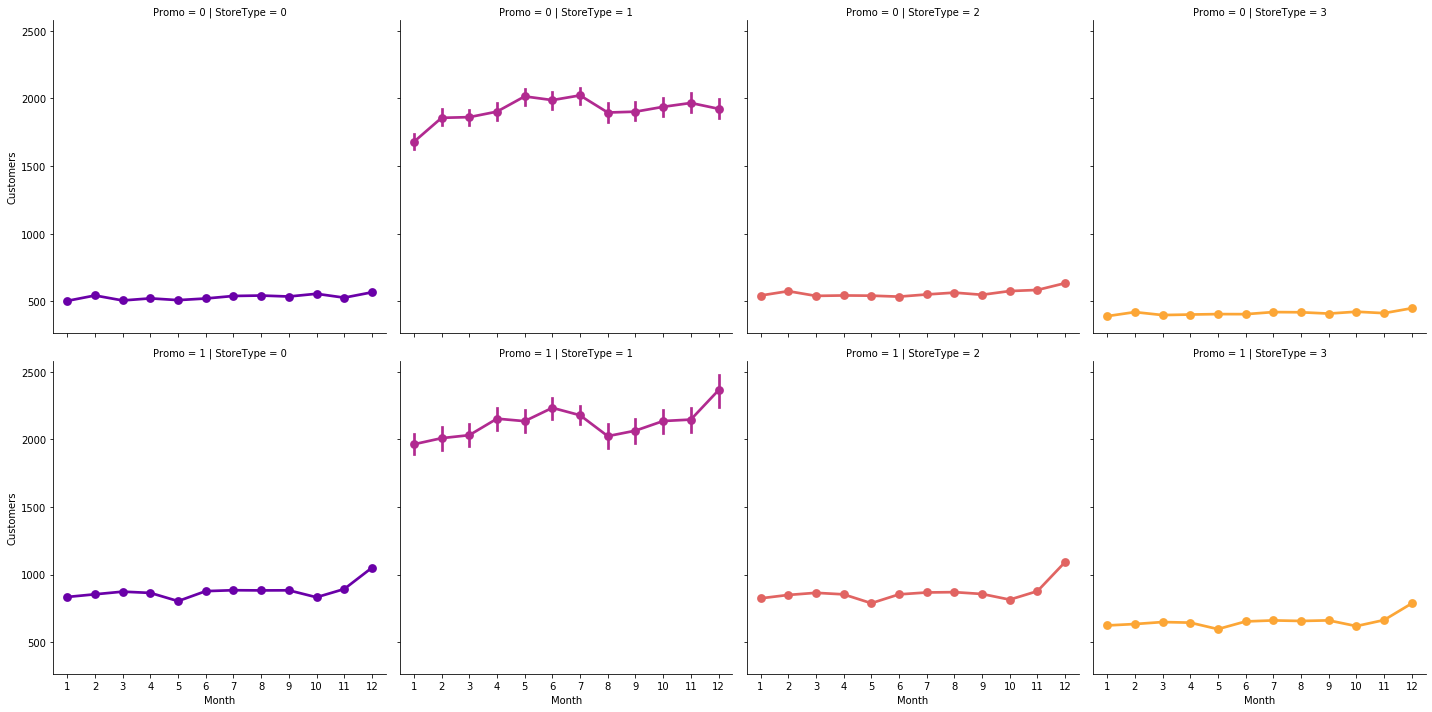

In [144]:
sns.factorplot(data = df_main, x = 'Month', y = "Customers", 
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'Promo')

C:\Users\George Ch\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


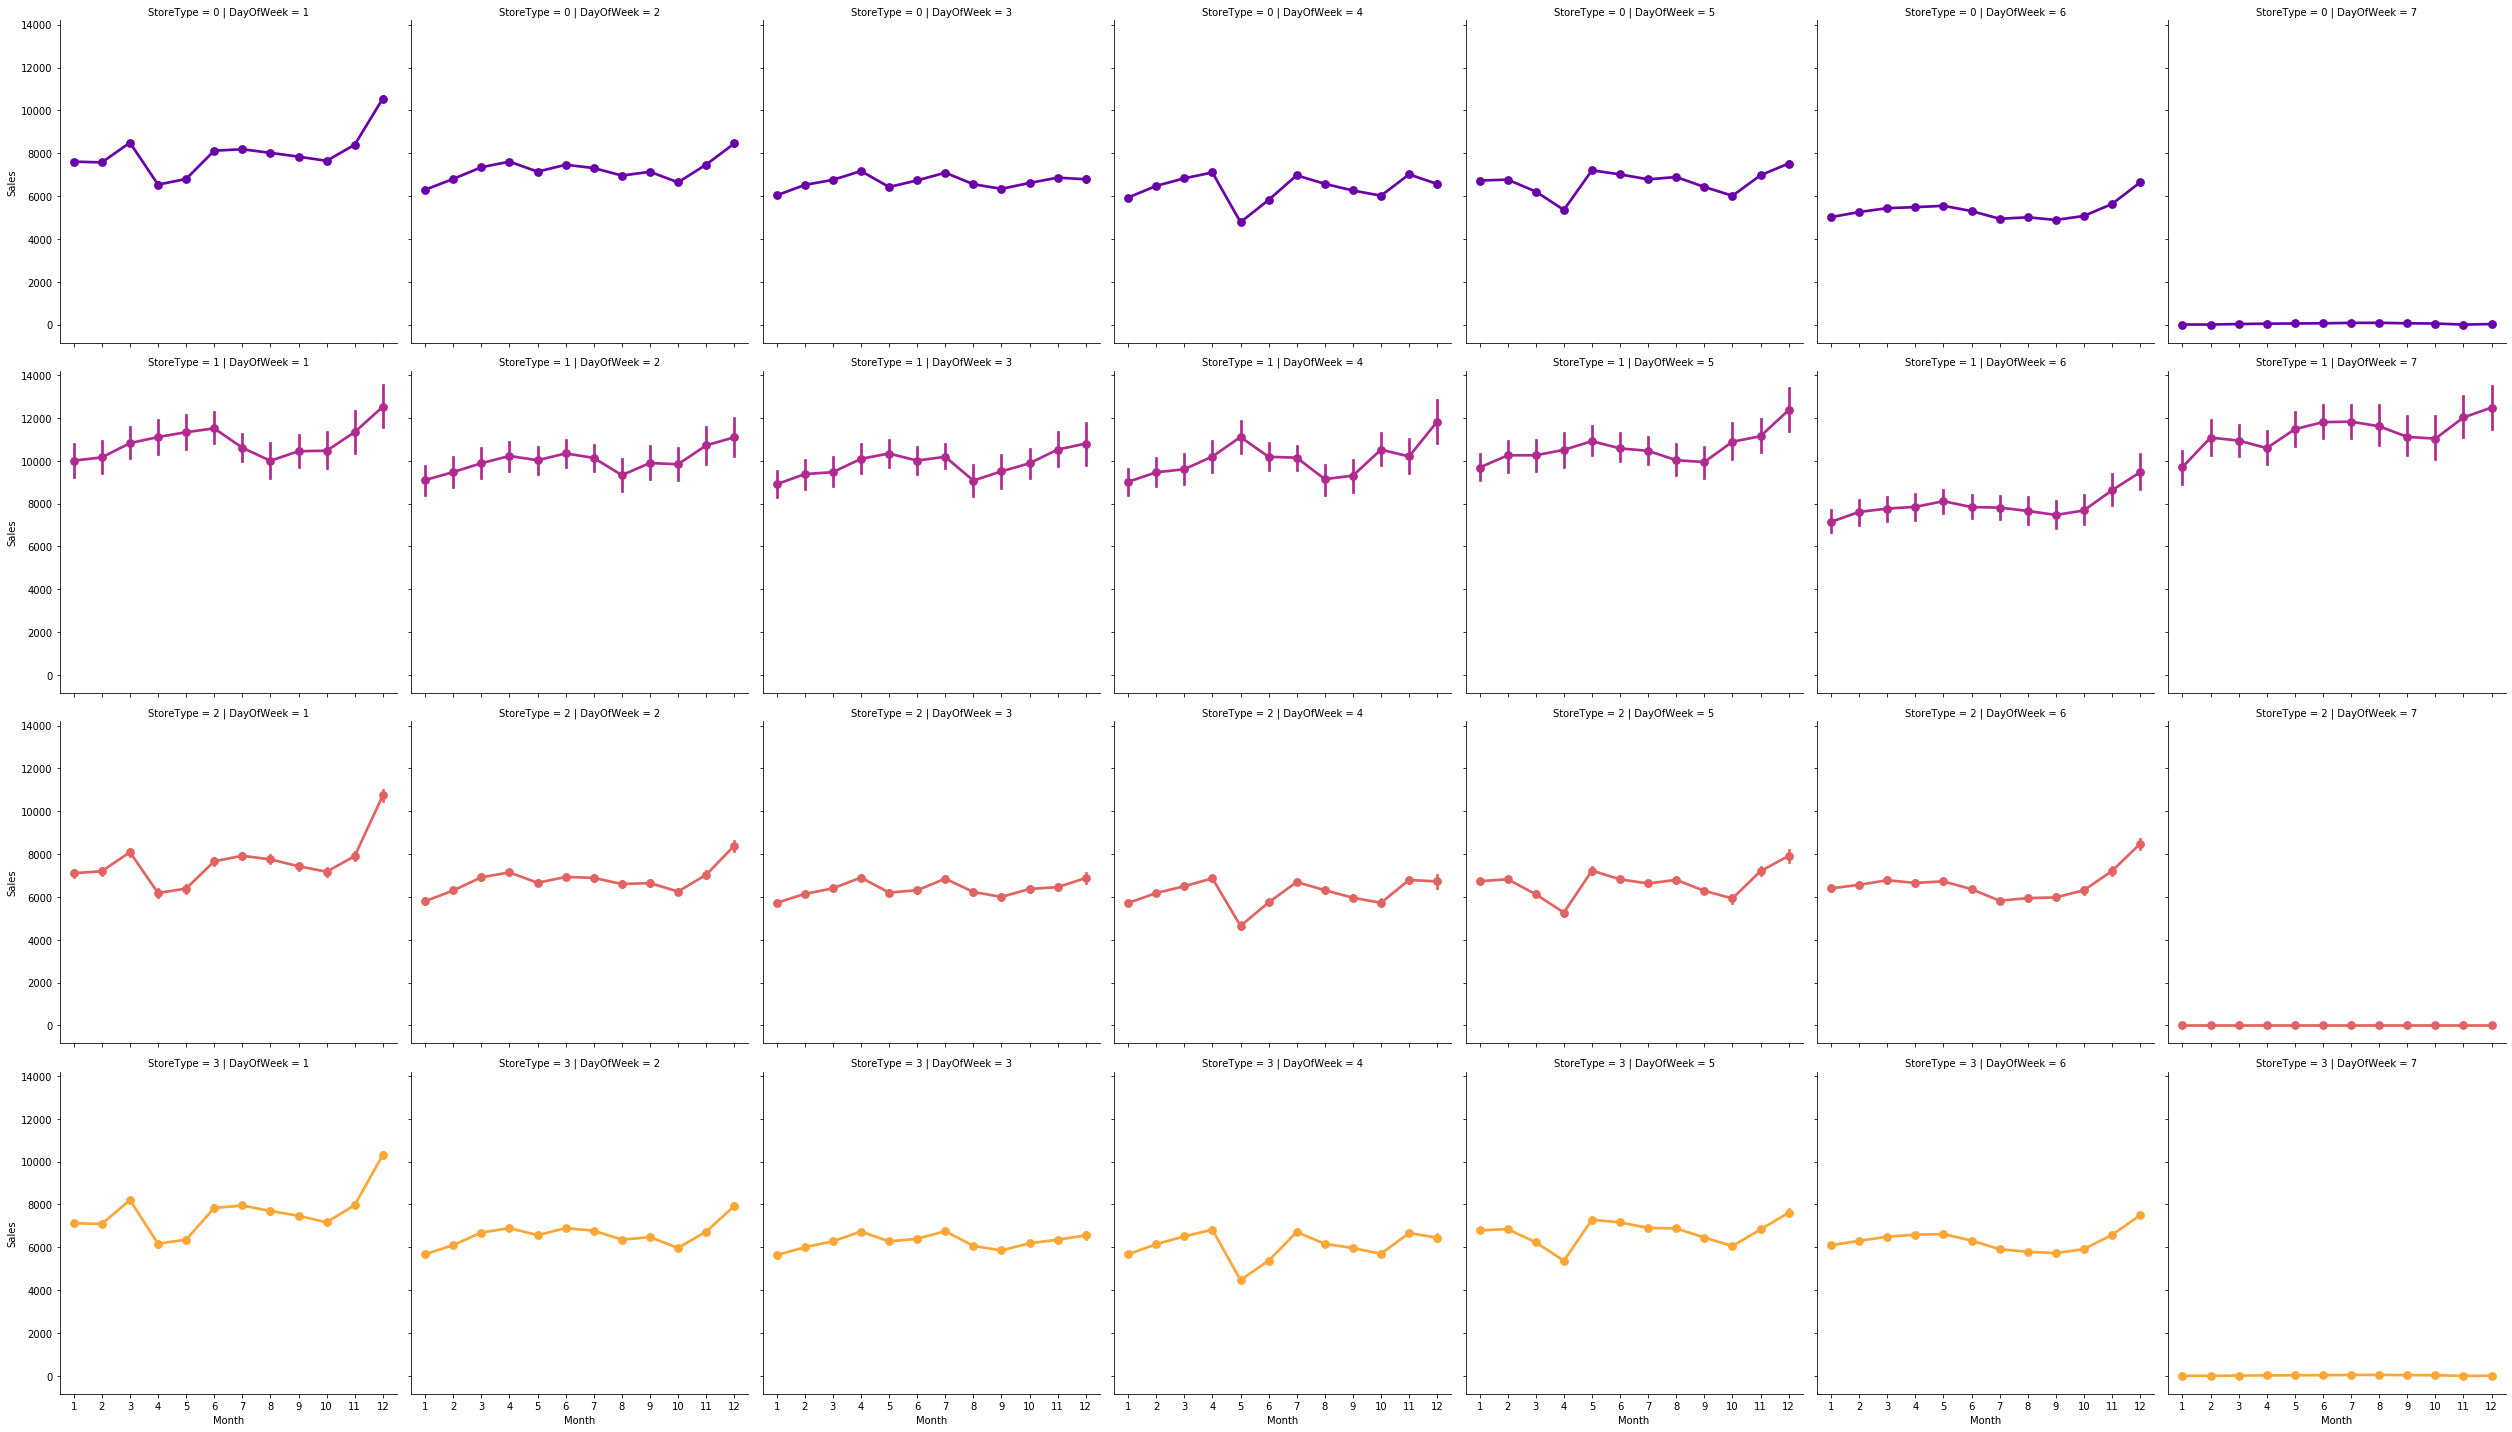

In [145]:
sns.factorplot(data = df_main, x = 'Month', y = "Sales", 
               col = 'DayOfWeek', # per store type in cols
               palette = 'plasma',
               hue = 'StoreType',
               row = 'StoreType') 

C:\Users\George Ch\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


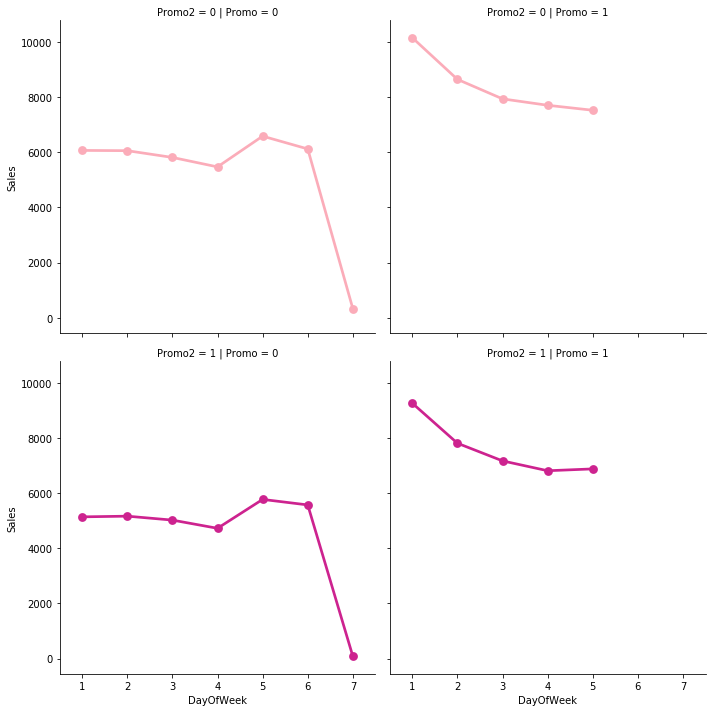

In [146]:
# sale per customer trends
sns.factorplot(data = df_main, x = 'DayOfWeek', y = "Sales", 
               col = 'Promo', 
               row = 'Promo2',
               hue = 'Promo2',
               palette = 'RdPu')

In [48]:
df.shape

(1017209, 9)

In [49]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [50]:
df.isna().sum().sum()

0

In [51]:
df_store.isna().sum().sum()

2343

In [52]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [53]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7


In [54]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
Year              int64
Month             int64
dtype: object

In [55]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [56]:
df.loc[df['StateHoliday'] == '0', 'StateHoliday'] = 0
df.loc[df['StateHoliday'] == 'a', 'StateHoliday'] = 1
df.loc[df['StateHoliday'] == 'b', 'StateHoliday'] = 2
df.loc[df['StateHoliday'] == 'c', 'StateHoliday'] = 3
df['StateHoliday'] = df['StateHoliday'].astype(int, copy=False)

In [57]:
df['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

In [58]:
cor = pd.DataFrame(df.loc[:, ['DayOfWeek', 'Sales', 'Month', 'Year', 'Customers', 'Promo',
                                    'StateHoliday', 'SchoolHoliday']].corr())
print(cor)

               DayOfWeek     Sales     Month      Year  Customers     Promo  \
DayOfWeek       1.000000 -0.462125 -0.005362  0.001937  -0.386445 -0.392925   
Sales          -0.462125  1.000000  0.048768  0.023519   0.894711  0.452345   
Month          -0.005362  0.048768  1.000000 -0.269382   0.038179 -0.011747   
Year            0.001937  0.023519 -0.269382  1.000000  -0.001212  0.024300   
Customers      -0.386445  0.894711  0.038179 -0.001212   1.000000  0.316169   
Promo          -0.392925  0.452345 -0.011747  0.024300   0.316169  1.000000   
StateHoliday   -0.044265 -0.229029  0.038058 -0.005067  -0.204295 -0.024157   
SchoolHoliday  -0.205388  0.085124  0.103282 -0.036535   0.071568  0.067483   

               StateHoliday  SchoolHoliday  
DayOfWeek         -0.044265      -0.205388  
Sales             -0.229029       0.085124  
Month              0.038058       0.103282  
Year              -0.005067      -0.036535  
Customers         -0.204295       0.071568  
Promo             

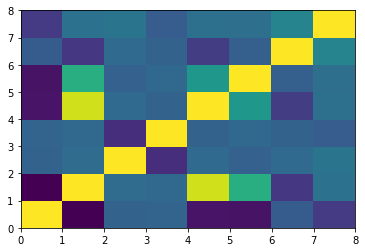

In [59]:
plt.pcolor(cor)
plt.show()

In [60]:
import seaborn as sns

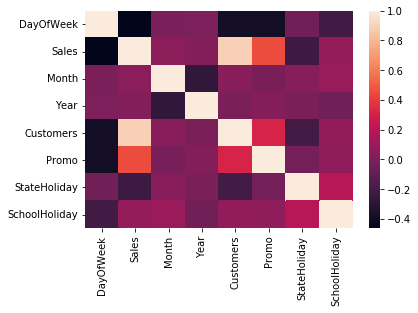

In [61]:
sns.heatmap(data=cor)
plt.show()

In [85]:
print("NANs for individual columns")
print("---------------------------")
from collections import Counter
x = {colname : df_store[colname].isnull().sum() for colname in df_store.columns}
Counter(x).most_common()

NANs for individual columns
---------------------------


[('Store', 0),
 ('StoreType', 0),
 ('Assortment', 0),
 ('CompetitionDistance', 0),
 ('CompetitionOpenSinceMonth', 0),
 ('CompetitionOpenSinceYear', 0),
 ('Promo2', 0),
 ('Promo2SinceWeek', 0),
 ('Promo2SinceYear', 0),
 ('PromoInterval', 0)]

In [63]:
df_store.shape

(1115, 10)

In [64]:
df_store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [93]:
df_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int32
dtype: object

In [96]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2
2,3,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2
3,4,2,2,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0


In [67]:
df_store['Promo2SinceWeek'].fillna(0, inplace=True)

In [70]:
df_store['Promo2SinceYear'].fillna(0, inplace=True)

In [73]:
print(df_store['CompetitionOpenSinceYear'].median())

2010.0


In [76]:
df_store['CompetitionOpenSinceYear'].fillna(2010, inplace=True)

In [78]:
print(df_store['CompetitionDistance'].mean())

5404.901079136691


In [79]:
df_store['CompetitionDistance'].fillna(5404.90, inplace=True)

In [81]:
print(df_store['CompetitionOpenSinceMonth'].mean())

7.2247043363994745


In [82]:
df_store['CompetitionOpenSinceMonth'].fillna(7.224, inplace=True)

In [84]:
df_store['PromoInterval'].fillna(0, inplace=True)

In [86]:
df_store.PromoInterval.value_counts()

0                   544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [87]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le = LabelEncoder()

In [91]:
df_store['PromoInterval'] = le.fit_transform(df_store['PromoInterval'].astype(str))

In [94]:
df_store['StoreType'] = le.fit_transform(df_store['StoreType'].astype(str))

In [95]:
df_store['Assortment'] = le.fit_transform(df_store['Assortment'].astype(str))

In [97]:
df_main=pd.merge(df, df_store, how='left', on='Store')

In [98]:
df_main.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,2,2,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0


In [99]:
df_main.shape

(1017209, 20)

In [100]:
df_main.isna().sum().sum()

0

In [102]:
df1 = df_main[['Date','Sales']].agg(['min','max'])
print (df1)

           Date  Sales
min  2013-01-01      0
max  2015-07-31  41551


In [104]:
import datetime

In [107]:
df_tr = df_main.loc[df_main['Date'] <= '2015-01-01']
df_val = df_main.loc[df_main['Date'] > '2015-01-01']

In [115]:
df_tr.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
235265,1,4,0,0,0,0,1,1,2015,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0
235266,2,4,0,0,0,0,0,1,2015,1,0,0,570.0,11.0,2007.0,1,13.0,2010.0,2
235267,3,4,0,0,0,0,1,1,2015,1,0,0,14130.0,12.0,2006.0,1,14.0,2011.0,2
235268,4,4,0,0,0,0,1,1,2015,1,2,2,620.0,9.0,2009.0,0,0.0,0.0,0
235269,5,4,0,0,0,0,1,1,2015,1,0,0,29910.0,4.0,2015.0,0,0.0,0.0,0


In [113]:
df_tr.drop('Date', axis=1, inplace=True)
df_val.drop('Date', axis=1, inplace=True)

C:\Users\George Ch\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [116]:
x_tr = df_tr.drop(columns='Sales')
y_tr = df_tr['Sales'] 

x_val = df_val.drop(columns='Sales')
y_val = df_val['Sales'] 

In [118]:
from xgboost import XGBRegressor

In [119]:
model = XGBRegressor()

In [135]:
model.fit(x_tr ,y_tr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [136]:
y_pred=model.predict(x_val)

In [137]:
print(model.score(x_val, y_val))

0.8908751605277602


In [138]:
print(model.score(x_tr, y_tr))

0.9051393736548826


In [124]:
df_test=pd.read_csv('store_test.csv')

In [126]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [127]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7


In [128]:
x_tr = df_tr.drop(columns='Customers')
x_val = df_val.drop(columns='Customers')

In [134]:
x_tr = x_tr.drop(columns='Sales')
x_val = x_val.drop(columns='Sales')